<a href="https://colab.research.google.com/github/170294r/Pump-it-Up-Data-Mining-the-Water-Table-/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Test set values.csv to Test set values.csv
Saving Training set labels.csv to Training set labels.csv
Saving Training set values.csv to Training set values.csv


In [1]:
import io
df_train_set = pd.read_csv(io.BytesIO(uploaded['Training set values.csv']))
df_train_labels = pd.read_csv( io.BytesIO(uploaded['Training set labels.csv']))

NameError: ignored

In [ ]:
df_train_labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [ ]:
df_train_set.set_index('id',inplace=True)

In [ ]:
df_train_labels.set_index('id',inplace=True)

In [ ]:
df = pd.merge(df_train_labels, df_train_set, how = 'inner', left_index = True,right_index=True)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [ ]:
df.isna().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [ ]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [ ]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [ ]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [ ]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [ ]:
df.loc[df['management_group']=='user-group']['management'].value_counts()

vwc            40507
wug             6515
water board     2933
wua             2535
Name: management, dtype: int64

In [ ]:
df.groupby(['management_group','management']).count() 

id  ...  waterpoint_type_group
management_group management               ...                       
commercial       company             685  ...                    685
                 private operator   1971  ...                   1971
                 trust                78  ...                     78
                 water authority     904  ...                    904
other            other               844  ...                    844
                 other - school       99  ...                     99
parastatal       parastatal         1768  ...                   1768
unknown          unknown             561  ...                    561
user-group       vwc               40507  ...                  40507
                 water board        2933  ...                   2933
                 wua                2535  ...                   2535
                 wug                6515  ...                   6515

[12 rows x 39 columns]

In [ ]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [ ]:
df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

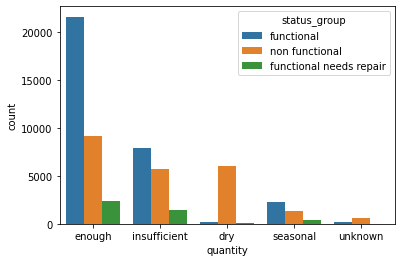

In [ ]:
ax = sns.countplot(x='quantity', hue="status_group", data=df)

In [ ]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [ ]:
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [ ]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [ ]:
df.groupby(['source_class','source']).count()
# to see how many sub-groups have in source_class according to source column

id  ...  waterpoint_type_group
source_class source                       ...                       
groundwater  hand dtw                874  ...                    874
             machine dbh           11075  ...                  11075
             shallow well          16824  ...                  16824
             spring                17021  ...                  17021
surface      dam                     656  ...                    656
             lake                    765  ...                    765
             rainwater harvesting   2295  ...                   2295
             river                  9612  ...                   9612
unknown      other                   212  ...                    212
             unknown                  66  ...                     66

[10 rows x 39 columns]

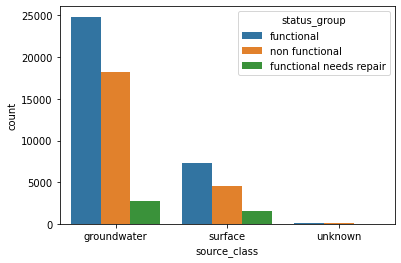

In [ ]:
ax = sns.countplot(x='source_class', hue="status_group", data=df)

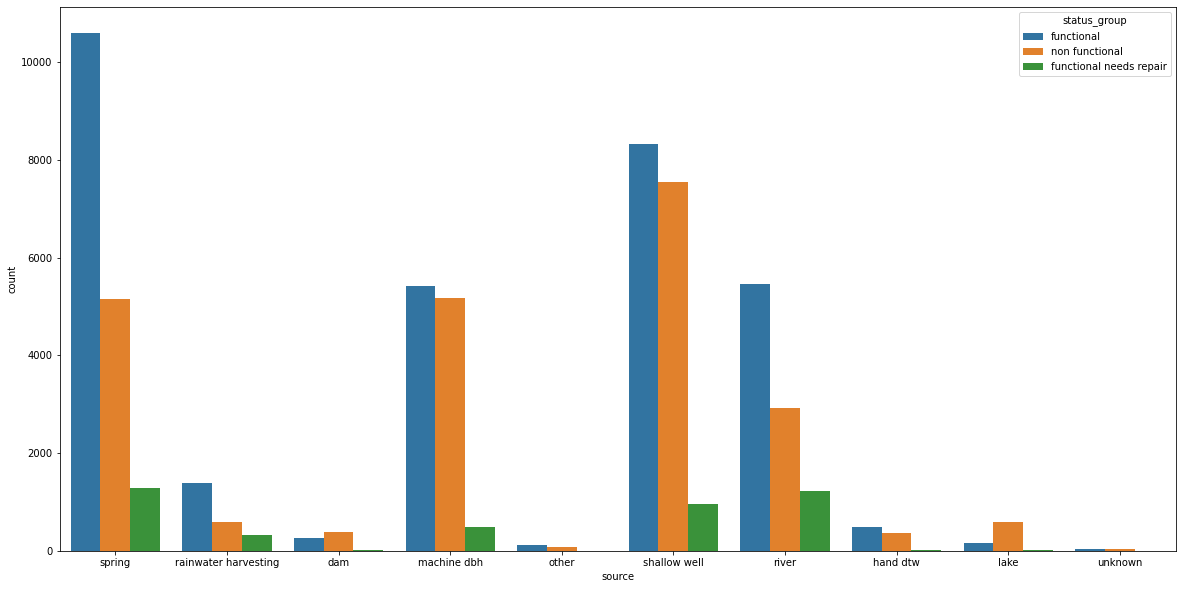

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source', hue="status_group", data=df)



In [ ]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [ ]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

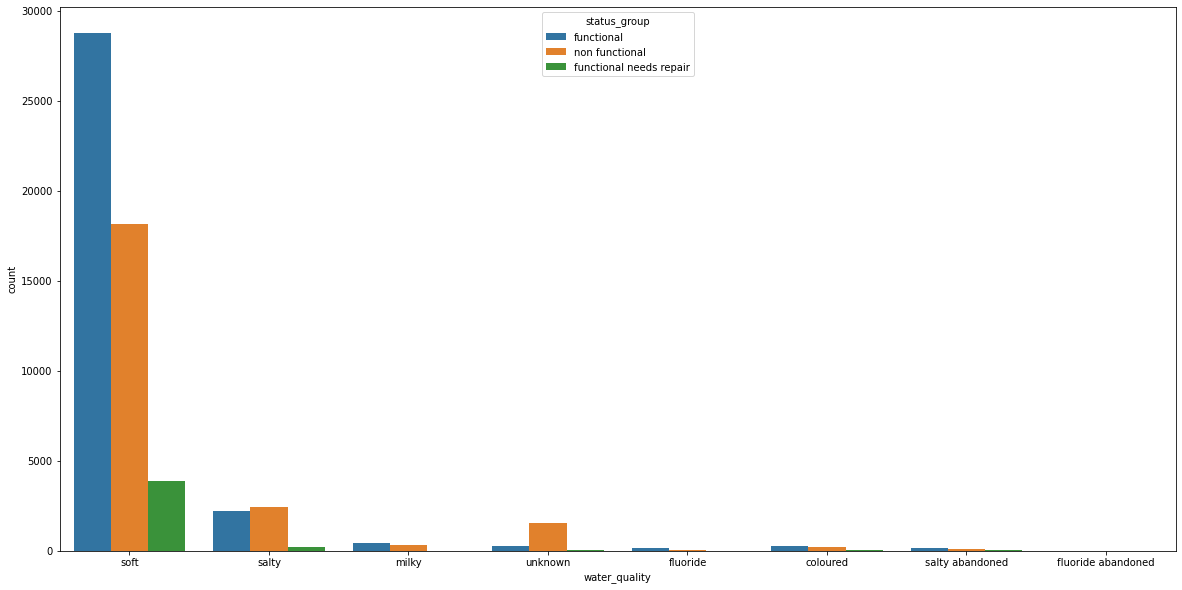

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df)

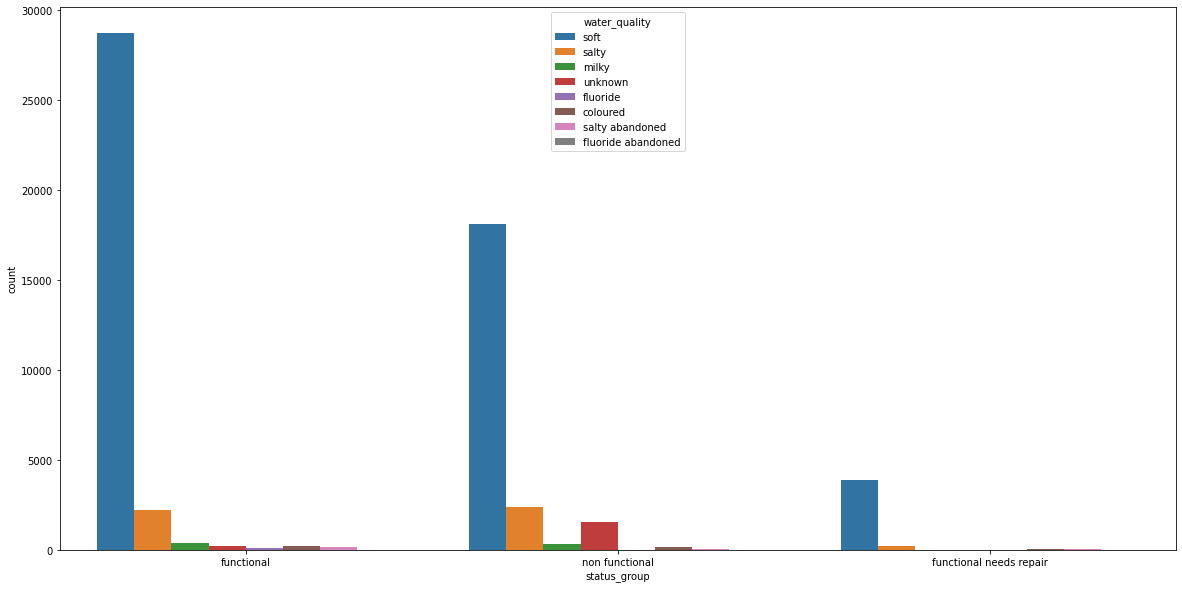

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='status_group', hue="water_quality", data=df)

In [ ]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [ ]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

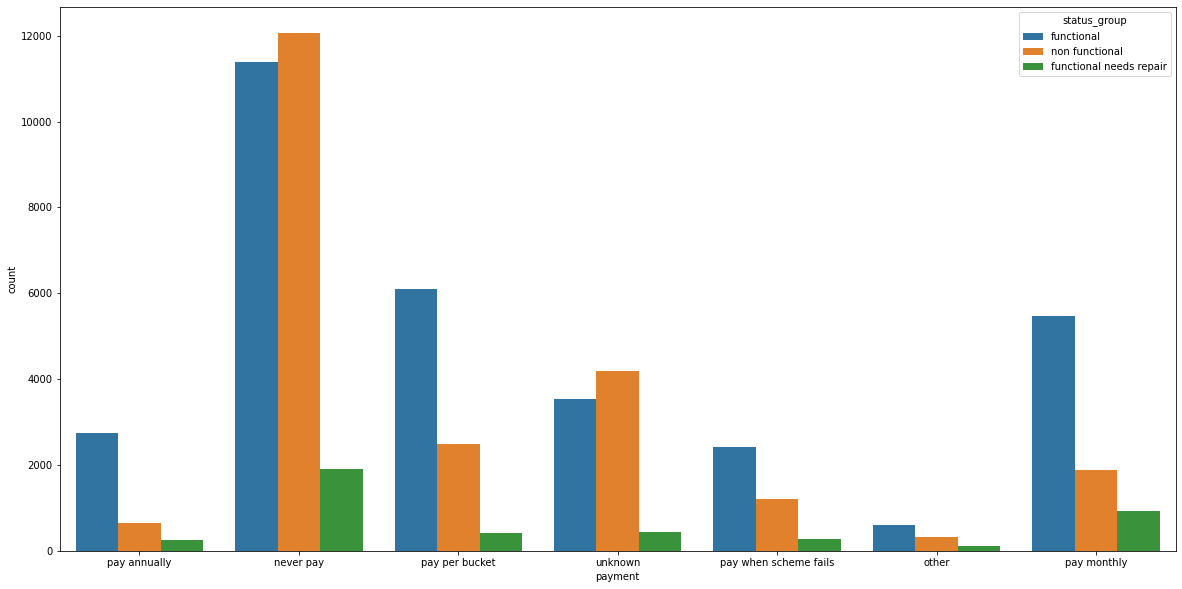

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='payment', hue="status_group", data=df)

In [ ]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [ ]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [ ]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [ ]:
df.groupby(['extraction_type_class','extraction_type_group']).count()

id  ...  waterpoint_type_group
extraction_type_class extraction_type_group         ...                       
gravity               gravity                26780  ...                  26780
handpump              afridev                 1770  ...                   1770
                      india mark ii           2400  ...                   2400
                      india mark iii            98  ...                     98
                      nira/tanira             8154  ...                   8154
                      other handpump           364  ...                    364
                      swn 80                  3670  ...                   3670
motorpump             mono                    2865  ...                   2865
                      other motorpump          122  ...                    122
other                 other                   6430  ...                   6430
rope pump             rope pump                451  ...                    451
submersible           submersible             6179  ...                   6179
wind-powered          wind-powered             117  ...                    117

[13 rows x 39 columns]

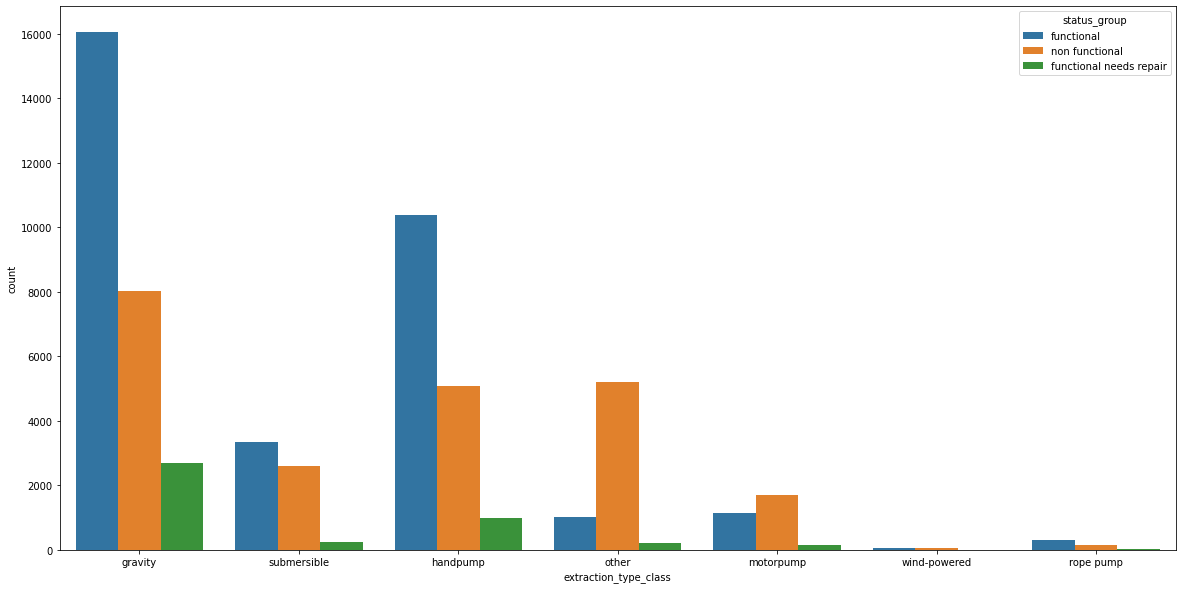

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_class', hue="status_group", data=df)



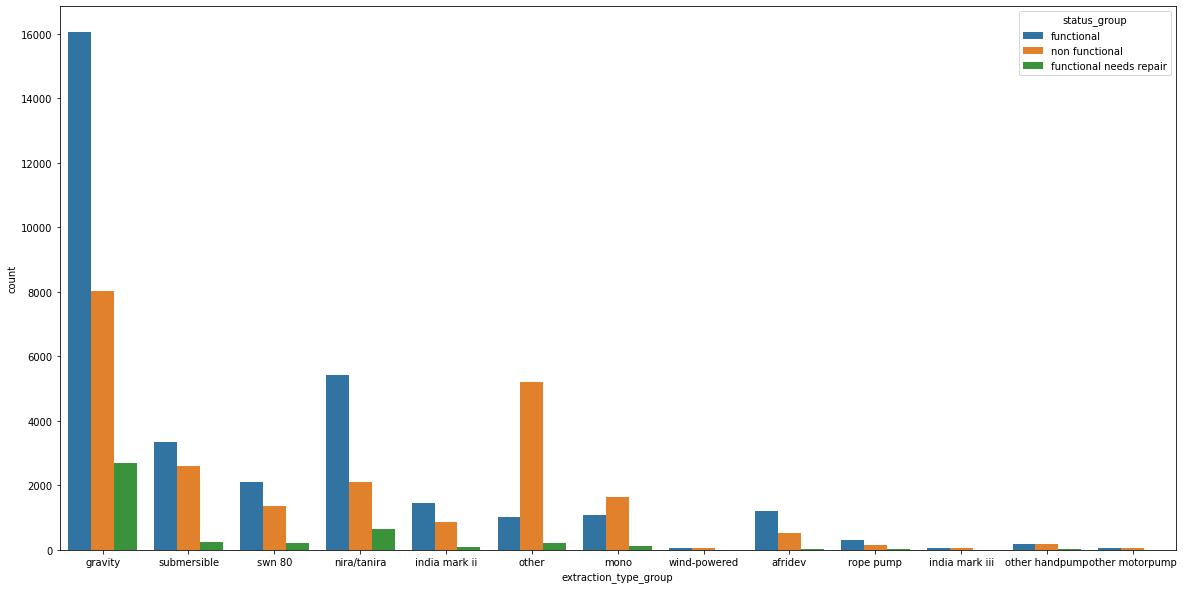

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_group', hue="status_group", data=df)

In [ ]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [ ]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

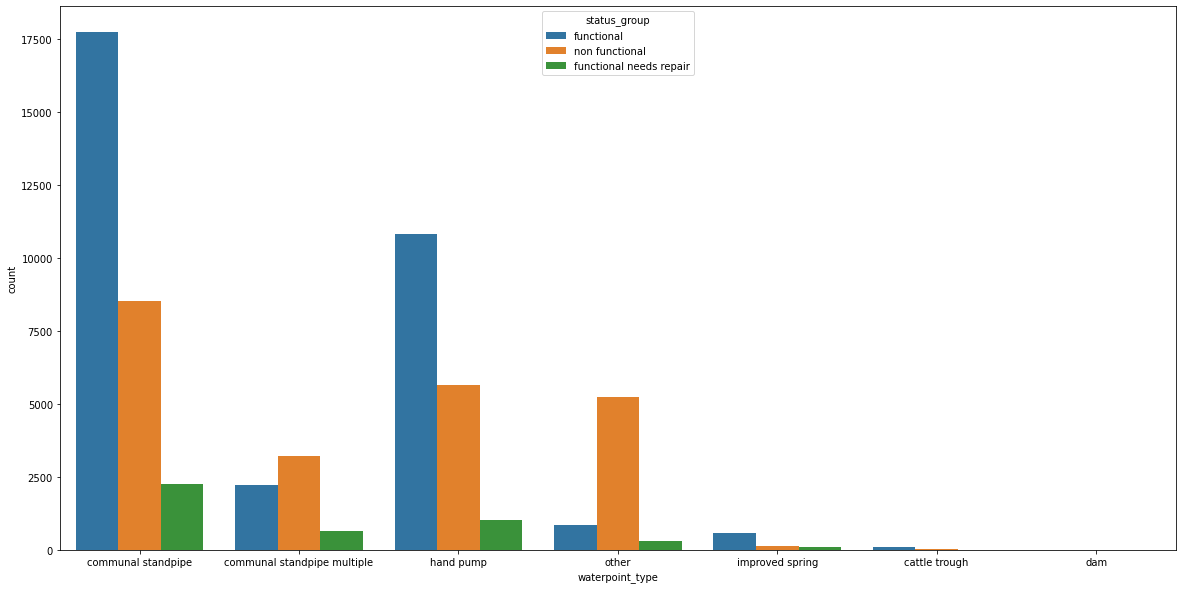

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=df)

In [ ]:
df.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group'],inplace=True )

In [ ]:
import io
df_test_set = pd.read_csv(io.BytesIO(uploaded['Test set values.csv']))

In [ ]:
df_test_set.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group'],inplace=True )

In [ ]:
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [ ]:
df['decade'] = df['construction_year'] #creating new columns
df_test_set['decade'] = df_test_set['construction_year'] #creating new columns

In [ ]:
# dividing the column decades

df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)
# dividing the column decades

df_test_set['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df_test_set['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df_test_set['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df_test_set['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df_test_set['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df_test_set['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [ ]:
df['decade'].value_counts()

0      20709
00s    15330
90s     7678
80s     5578
10s     5161
70s     4406
60s      538
Name: decade, dtype: int64

In [ ]:
df_test_set['decade'].value_counts()

0      5260
00s    3833
90s    1933
80s    1361
10s    1300
70s    1042
60s     121
Name: decade, dtype: int64

In [ ]:
df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)
#changing the missing values in construction year column
df_test_set['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)
#changing the missing values in construction year column

In [ ]:
df.drop(columns=['recorded_by'],inplace=True ) #dropping the column
df_test_set.drop(columns=['recorded_by'],inplace=True ) #dropping the column

In [ ]:
df['installer'].fillna(value='Unknown',inplace=True)
df_test_set['installer'].fillna(value='Unknown',inplace=True)

In [ ]:
df['installer'].value_counts().head(100).sum()

47237

In [ ]:
df['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) # filling 0 values with unknown
df_test_set['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) # filling 0 values with unknown

In [ ]:
# From the most common 100 value counts we realized some spelling mistakes or different syntax between same categories

# Replacing the spelling mistakes and collect same categories in same name

df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

# From the most common 100 value counts we realized some spelling mistakes or different syntax between same categories

# Replacing the spelling mistakes and collect same categories in same name

df_test_set['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df_test_set['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df_test_set['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df_test_set['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

df_test_set['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

df_test_set['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

df_test_set['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df_test_set['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df_test_set['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df_test_set['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

df_test_set['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

df_test_set['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df_test_set['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [ ]:
# continue to replacing spellin mistakes and getting together values
df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

# continue to replacing spellin mistakes and getting together values
df_test_set['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df_test_set['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df_test_set['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df_test_set['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df_test_set['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df_test_set['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df_test_set['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df_test_set['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df_test_set['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df_test_set['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [ ]:
(47237*100)/59400 # percentage of seeing value counts of installer

79.52356902356902

In [ ]:
df['installer'].value_counts().head(20) #taking most 20 common installer

DWE                   17402
Unknown                4435
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
TCRS                    707
world vision            681
CES                     610
Fini Water              593
RC Church               461
villagers               408
LGA                     408
WEDECO                  397
TASAF                   396
Unicef                  332
Name: installer, dtype: int64

In [ ]:
# Creating new dataframe which just picks our desired values

df_1 = df.loc[df['installer']== 'DWE']
df_2 = df.loc[df['installer']== 'Unknown']              
df_3 = df.loc[df['installer']== 'Government'] 
df_4 = df.loc[df['installer']== 'Community'] 
df_5 = df.loc[df['installer']== 'DANIDA'] 
df_6 = df.loc[df['installer']== 'RWE'] 
df_7 = df.loc[df['installer']== 'District council'] 
df_8 = df.loc[df['installer']== 'Central government']
df_9 = df.loc[df['installer']== 'KKKT'] 
df_10 = df.loc[df['installer']== 'HESAWA'] 
df_11 = df.loc[df['installer']== 'TCRS'] 
df_12 = df.loc[df['installer']== 'world vision'] 
df_13 = df.loc[df['installer']== 'CES'] 
df_14 = df.loc[df['installer']== 'Fini Water'] 
df_15 = df.loc[df['installer']== 'RC Church'] 
df_16 = df.loc[df['installer']== 'villagers']
df_17 = df.loc[df['installer']== 'LGA']

df_installer = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,
                          df_13,df_14,df_15,df_16,df_17], ignore_index=True)

# Creating new dataframe which just picks our desired values

df_test_set1 = df_test_set.loc[df_test_set['installer']== 'DWE']
df_test_set2 = df_test_set.loc[df_test_set['installer']== 'Unknown']              
df_test_set3 = df_test_set.loc[df_test_set['installer']== 'Government'] 
df_test_set4 = df_test_set.loc[df_test_set['installer']== 'Community'] 
df_test_set5 = df_test_set.loc[df_test_set['installer']== 'DANIDA'] 
df_test_set6 = df_test_set.loc[df_test_set['installer']== 'RWE'] 
df_test_set7 = df_test_set.loc[df_test_set['installer']== 'District council'] 
df_test_set8 = df_test_set.loc[df_test_set['installer']== 'Central government']
df_test_set9 = df_test_set.loc[df_test_set['installer']== 'KKKT'] 
df_test_set10 = df_test_set.loc[df_test_set['installer']== 'HESAWA'] 
df_test_set11 = df_test_set.loc[df_test_set['installer']== 'TCRS'] 
df_test_set12 = df_test_set.loc[df_test_set['installer']== 'world vision'] 
df_test_set13 = df_test_set.loc[df_test_set['installer']== 'CES'] 
df_test_set14 = df_test_set.loc[df_test_set['installer']== 'Fini Water'] 
df_test_set15 = df_test_set.loc[df_test_set['installer']== 'RC Church'] 
df_test_set16 = df_test_set.loc[df_test_set['installer']== 'villagers']
df_test_set17 = df_test_set.loc[df_test_set['installer']== 'LGA']

df_test_set_installer = pd.concat([df_test_set1,df_test_set2,df_test_set3,df_test_set4,df_test_set5,df_test_set6,df_test_set7,df_test_set8,df_test_set9,df_test_set10,df_test_set11,df_test_set12,
                          df_test_set13,df_test_set14,df_test_set15,df_test_set16,df_test_set17], ignore_index=True)

In [ ]:
df['installer_cat'] = df['installer']
df_test_set['installer_cat'] = df_test_set['installer']

In [ ]:
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


df.loc[~df["installer_cat"].isin(c_ins), "installer_cat"] = "Others"
# converting the values which has less than 400 value counts to others
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


df_test_set.loc[~df_test_set["installer_cat"].isin(c_ins), "installer_cat"] = "Others"
# converting the values which has less than 400 value counts to others

In [ ]:
df['funder'].fillna(value='Unknown',inplace=True)
df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)
# filling 0 and null values with unknown

df_test_set['funder'].fillna(value='Unknown',inplace=True)
df_test_set['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)
# filling 0 and null values with unknown

In [ ]:
df1 = df_test_set.loc[df_test_set['funder']== 'Government Of Tanzania']
df2 = df_test_set.loc[df_test_set['funder']== 'Unknown']              
df3 = df_test_set.loc[df_test_set['funder']== 'Danida'] 
df4 = df_test_set.loc[df_test_set['funder']== 'Hesawa'] 
df5 = df_test_set.loc[df_test_set['funder']== 'Rwssp'] 
df6 = df_test_set.loc[df_test_set['funder']== 'World Bank'] 
df7 = df_test_set.loc[df_test_set['funder']== 'Kkkt'] 
df8 = df_test_set.loc[df_test_set['funder']== 'World Vision']
df9 = df_test_set.loc[df_test_set['funder']== 'Unicef'] 
df10 = df_test_set.loc[df_test_set['funder']== 'Tasaf'] 
df11 = df_test_set.loc[df_test_set['funder']== 'District Council'] 
df12 = df_test_set.loc[df_test_set['funder']== 'Dhv'] 
df13 = df_test_set.loc[df_test_set['funder']== 'Private Individual'] 
df14 = df_test_set.loc[df_test_set['funder']== 'Dwsp'] 
df15 = df_test_set.loc[df_test_set['funder']== 'Norad'] 
df16 = df_test_set.loc[df_test_set['funder']== 'Germany Republi']
df17 = df_test_set.loc[df_test_set['funder']== 'Tcrs']
df18 = df_test_set.loc[df_test_set['funder']== 'Ministry Of Water']
df19 = df_test_set.loc[df_test_set['funder']== 'Water']
df20 = df_test_set.loc[df_test_set['funder']== 'Dwe']

df_funder = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,
                          df13,df14,df15,df16,df17,df18,df19,df20], ignore_index=True)

df_test_1 = df.loc[df['funder']== 'Government Of Tanzania']
df_test_2 = df.loc[df['funder']== 'Unknown']              
df_test_3 = df.loc[df['funder']== 'Danida'] 
df_test_4 = df.loc[df['funder']== 'Hesawa'] 
df_test_5 = df.loc[df['funder']== 'Rwssp'] 
df_test_6 = df.loc[df['funder']== 'World Bank'] 
df_test_7 = df.loc[df['funder']== 'Kkkt'] 
df_test_8 = df.loc[df['funder']== 'World Vision']
df_test_9 = df.loc[df['funder']== 'Unicef'] 
df_test_10 = df.loc[df['funder']== 'Tasaf'] 
df_test_11 = df.loc[df['funder']== 'District Council'] 
df_test_12 = df.loc[df['funder']== 'Dhv'] 
df_test_13 = df.loc[df['funder']== 'Private Individual'] 
df_test_14 = df.loc[df['funder']== 'Dwsp'] 
df_test_15 = df.loc[df['funder']== 'Norad'] 
df_test_16 = df.loc[df['funder']== 'Germany Republi']
df_test_17 = df.loc[df['funder']== 'Tcrs']
df_test_18 = df.loc[df['funder']== 'Ministry Of Water']
df_test_19 = df.loc[df['funder']== 'Water']
df_test_20 = df.loc[df['funder']== 'Dwe']

df_test_funder = pd.concat([df_test_1,df_test_2,df_test_3,df_test_4,df_test_5,df_test_6,df_test_7,df_test_8,df_test_9,df_test_10,df_test_11,df_test_12,
                          df_test_13,df_test_14,df_test_15,df_test_16,df_test_17,df_test_18,df_test_19,df_test_20], ignore_index=True)

In [ ]:
# To collect values together

df['funder_cat'] = df['funder'] #creating new column

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

df.loc[~df["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

# To collect values together

df_test_set['funder_cat'] = df_test_set['funder'] #creating new column

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

df_test_set.loc[~df_test_set["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [ ]:
df['funder_cat'].nunique()

21

In [ ]:
df_test_set['funder_cat'].nunique()

21

In [ ]:
df['longitude'].replace(to_replace = 0 , value =35.15, inplace=True) # changing 0 values to mean

In [ ]:
df_test_set.loc[df['longitude']!=0].describe() # to find the non-zero values mean

In [ ]:
df_test_set['longitude'].replace(to_replace = 0 , value =34.06, inplace=True) # changing 0 values to mean

In [ ]:
df.drop(columns=['wpt_name','scheme_name','id','region_code'],inplace=True )
df_test_set.drop(columns=['wpt_name','scheme_name','id','region_code'],inplace=True )

In [ ]:
df.drop(columns=['amount_tsh'],inplace=True )
df_test_set.drop(columns=['amount_tsh'],inplace=True )

In [ ]:
df['population'].replace(to_replace = 0 , value =281, inplace=True) #changing 0's to mean

In [ ]:
df_test_set.loc[df_test_set['population']!=0].describe() 

,gps_height,longitude,latitude,num_private,district_code,population,construction_year
count,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000
mean,957.686815,36.095878,-6.145897,0.655954,6.304246,290.954134,1997.191338
std,614.671104,2.590755,2.732964,10.260354,11.423768,563.265359,12.282133
min,-57.000000,29.612776,-11.564592,0.000000,1.000000,1.000000,1960.000000
25%,337.000000,34.714606,-8.313329,0.000000,2.000000,40.000000,1988.000000
50%,1125.000000,36.748375,-5.859215,0.000000,3.000000,150.000000,2000.000000
75%,1449.000000,37.971678,-3.613975,0.000000,5.000000,350.000000,2008.000000
max,2777.000000,40.325016,-1.106080,669.000000,67.000000,11469.000000,2013.000000


In [ ]:
df_test_set['population'].replace(to_replace = 0 , value =281, inplace=True) #changing 0's to mean

In [ ]:
df.drop(columns=['date_recorded','num_private'],inplace=True )

In [ ]:
df_test_set.drop(columns=['date_recorded','num_private'],inplace=True )

In [ ]:
df.drop(columns=['subvillage'],inplace=True )
df_test_set.drop(columns=['subvillage'],inplace=True )

In [ ]:
df['public_meeting'].fillna(value=True,inplace=True)
df['permit'].fillna(value=True, inplace=True)
df_test_set['public_meeting'].fillna(value=True,inplace=True)
df_test_set['permit'].fillna(value=True, inplace=True)

In [ ]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
df['status_group'] = df['status_group'].replace(target_status_group)

In [ ]:
df.to_csv('clean_data.csv')

In [ ]:
df_test_set.to_csv('clean_data_test.csv')
from google.colab import files
files.download("clean_data.csv")
files.download("clean_data_test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>